In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# Initialise parameters:
num_of_agents = 20 # number of agents
Timesteps = 50 # timesteps (1 = no steps taken)
R = 0.2 # confidence bound


min_age = 16
max_age = 81
op_drift = 0.01

youth_min_op = 0
youth_max_op = 0.4

In [49]:
opinions = np.random.rand(num_of_agents) # init all agents to [0,1]
ages = np.random.randint(min_age,max_age, size=num_of_agents) 

In [ ]:
def get_A(opinions,R):
    '''
    A function to return the average opinion within R of each opinion in a vector of opinions
    '''

    num_of_agents = len(opinions)

    # Create a square matrix consisting of the opinions vector repeated num_of_agents times
    opinions_repeated = np.array([opinions]*len(opinions))
    # Create matrix of boolean values indicating which opinions are within R of each opinion
    mask = abs(opinions_repeated - opinions_repeated.T) < R
    
    # Initialise averages matrix
    A = np.zeros(num_of_agents)

    # Loop over agents
    for i in range(num_of_agents):
        # Get average of opinions within R of opinion
        A[i] = np.mean(opinions[mask[i,:]])
        # print(A[i])
    
    return(A)

In [51]:
# Running model

# Initialising matrix of opinions over time
opinions_over_time = np.zeros((Timesteps, num_of_agents))
opinions_over_time[0,:] = opinions
# Initialising matrix of ages over time
ages_over_time = np.zeros((Timesteps,num_of_agents))
ages_over_time[0,:] = ages


for t in range(Timesteps-1):
    # Basic opinion update (minimum necesssary to keep opinions within a range)
#    opinions_over_time[t+1,:] = np.minimum(get_A(opinions_over_time[t,:], R) + op_drift, 1.0)

    # --- Compute age-dependent drift ---
    drift = np.zeros(num_of_agents)
    drift[ages_over_time[t, :] < 40] = -op_drift      # young drift down
    drift[ages_over_time[t, :] > 55] = +op_drift      # old drift up
    # middle-aged agents (40–55) => no drift (0)

    # --- Opinion update ---
    opinions_over_time[t+1,:] = np.maximum(np.minimum(get_A(opinions_over_time[t, :], R) + drift, 1.0), 0)

    # Update ages
    ages_over_time[t+1,:] = ages_over_time[t,:] + 1
    
    # Find who dies at next step
    deaths = ages_over_time[t+1,:] >= max_age
    num_deaths = sum(deaths)

    # Replace the people who die with young people
    ages_over_time[t+1, deaths] = min_age

    # Initialise new people with uniformly distributed opinions within some range
    opinions_over_time[t+1,:][deaths] = (youth_max_op - youth_min_op) * np.random.random(num_deaths) + youth_min_op 

    if num_deaths > 0:
        print(f"Step {t}: {num_deaths} deaths")
        print("Dead indices:", np.where(deaths)[0])
        print("Ages of dead agents:", ages_over_time[t, deaths])

Step 4: 1 deaths
Dead indices: [0]
Ages of dead agents: [80.]
Step 5: 1 deaths
Dead indices: [19]
Ages of dead agents: [80.]
Step 15: 1 deaths
Dead indices: [15]
Ages of dead agents: [80.]
Step 17: 1 deaths
Dead indices: [3]
Ages of dead agents: [80.]
Step 20: 1 deaths
Dead indices: [7]
Ages of dead agents: [80.]
Step 21: 1 deaths
Dead indices: [6]
Ages of dead agents: [80.]
Step 23: 1 deaths
Dead indices: [13]
Ages of dead agents: [80.]
Step 25: 1 deaths
Dead indices: [2]
Ages of dead agents: [80.]
Step 26: 1 deaths
Dead indices: [17]
Ages of dead agents: [80.]
Step 32: 1 deaths
Dead indices: [11]
Ages of dead agents: [80.]
Step 34: 1 deaths
Dead indices: [5]
Ages of dead agents: [80.]
Step 35: 1 deaths
Dead indices: [16]
Ages of dead agents: [80.]
Step 37: 1 deaths
Dead indices: [18]
Ages of dead agents: [80.]
Step 38: 1 deaths
Dead indices: [8]
Ages of dead agents: [80.]
Step 47: 1 deaths
Dead indices: [4]
Ages of dead agents: [80.]


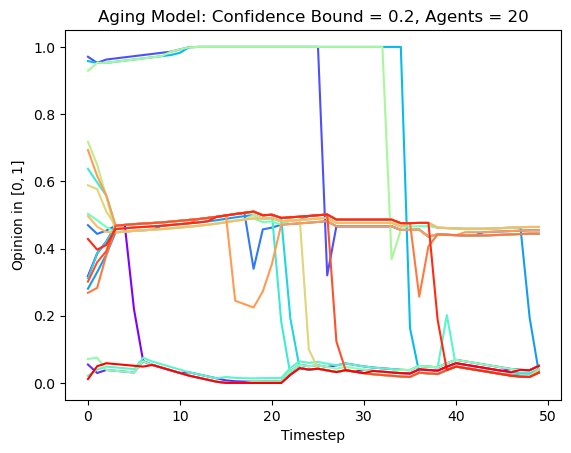

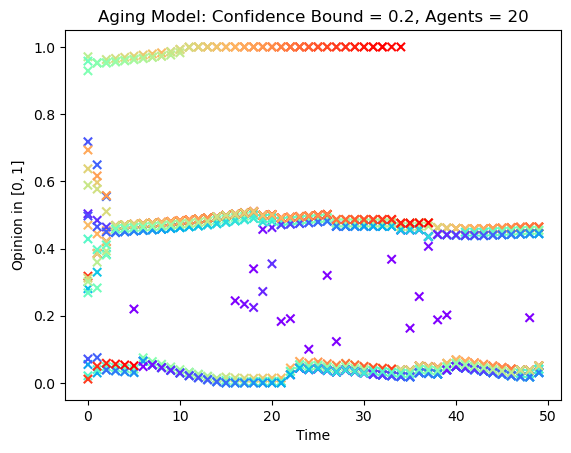

In [52]:
#plotting

colours = plt.cm.rainbow(np.linspace(0,1,num_of_agents))

for i in range(num_of_agents):
    plt.plot(opinions_over_time[:,i],color=colours[i])
plt.title(f'Aging Model: Confidence Bound = {R}, Agents = {num_of_agents}')
plt.xlabel('Timestep')
plt.ylabel('Opinion in $[0,1]$')
plt.show()

#plotting

colours = plt.cm.rainbow(np.linspace(0,1,round(max_age-min_age+1)))
plt.scatter(np.array([range(Timesteps)]*num_of_agents).T, opinions_over_time, c=ages_over_time, cmap='rainbow', marker='x')
plt.title(f'Aging Model: Confidence Bound = {R}, Agents = {num_of_agents}')
plt.xlabel('Time')
plt.ylabel('Opinion in $[0,1]$')
plt.show()